## Install pymatch

In [4]:
#!pip install pymatch

You should consider upgrading via the 'C:\Users\10157\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pymatch: filename=pymatch-0.3.4-py3-none-any.whl size=9117 sha256=04f48d969b7cc52fc093ab199aea1a5d17875ca62f40276b2664671d1849718a
  Stored in directory: c:\users\10157\appdata\local\pip\cache\wheels\f2\10\99\d835e60df49ea4e8dffe9b92225760e449e887d54e8d109b5e
Successfully built pymatch


## Import Libs

In [1]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np

%matplotlib inline

## Prepare Data

In [200]:
data = pd.read_csv('census_data/co_2021.csv')

In [201]:
data = data.drop('Unnamed: 0', axis=1)

In [202]:
data

,population,income,house_value,rent,tract,unemployment,poverty
0,4027,22984,325000,1062,8001007801,0.08,0.30
1,4598,25444,300500,1061,8001007802,0.07,0.32
2,5749,31779,304000,1190,8001007900,0.07,0.18
3,5515,30644,336500,1363,8001008000,0.04,0.09
4,1538,30441,-666666666,1815,8001008100,0.03,0.23
...,...,...,...,...,...,...,...
1442,5581,40310,371700,1252,8123002300,0.02,0.08
1443,5870,36788,357700,822,8123002501,0.09,0.20
1444,7335,33352,345600,1203,8123002502,0.04,0.11
1445,4229,33886,187700,843,8125963100,0.05,0.12


#### basic statistics of cummulative months

In [203]:
tract_records = pd.read_csv('tract_records.csv')
tract_records.rename(columns = {'Unnamed: 0':'tract'}, inplace = True)

In [204]:
tract_records

,tract,2014_med,2015_med,2016_med,2017_med,2018_med,2019_med,2020_med,2021_med,2014_rec,2015_rec,2016_rec,2017_rec,2018_rec,2019_rec,2020_rec,2021_rec,total
0,2000,4.0,144.0,254.0,386.0,516.0,631.0,734.0,801.0,4.0,68.0,119.0,167.0,221.0,275.0,319.0,355.0,1156.0
1,967602,0.0,24.0,48.0,72.0,88.0,107.0,131.0,153.0,0.0,28.0,54.0,90.0,118.0,149.0,185.0,225.0,378.0
2,10402,0.0,12.0,27.0,40.0,56.0,80.0,104.0,122.0,NaN,NaN,3.0,15.0,31.0,55.0,79.0,97.0,219.0
3,1901,0.0,12.0,27.0,51.0,75.0,99.0,123.0,147.0,NaN,NaN,3.0,15.0,27.0,39.0,51.0,76.0,223.0
4,12208,14.0,67.0,133.0,211.0,258.0,296.0,335.0,359.0,14.0,67.0,133.0,214.0,273.0,328.0,391.0,438.0,797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
302,969601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
303,965201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
304,12904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [205]:
#tract_records['2014_both'] = tract_records['2017_med']+tract_records['2017_rec']
tract_records['total'].fillna(0, inplace=True)

In [207]:
tract_records['total'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0      1156.0
1       378.0
2       219.0
3       223.0
4       797.0
        ...  
301       0.0
302       0.0
303       0.0
304       0.0
305       0.0
Name: total, Length: 306, dtype: float64>

We only have tract records for 306 tracts, so assuming  others do not have any dispensary.

#### merge two datasets 

In [208]:
len(tract_records)

306

In [209]:
len(data)

1447

In [210]:
data['tract_str'] = data['tract'].astype(str)

In [211]:
def last_6_digit(x):
    return x[-6:]

In [212]:
data['tract_str_last6'] = data['tract_str'].apply(last_6_digit)

In [213]:
data['tract'] = data['tract_str_last6'].astype(int)

In [214]:
data['tract']

0         7801
1         7802
2         7900
3         8000
4         8100
         ...  
1442      2300
1443      2501
1444      2502
1445    963100
1446    963200
Name: tract, Length: 1447, dtype: int32

In [215]:
data_prepared = pd.merge(data, tract_records, on = "tract", how="left")

In [216]:
data_prepared['total'].fillna(0, inplace=True)

In [217]:
data_prepared['total'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1442    558.0
1443      0.0
1444      0.0
1445      0.0
1446      0.0
Name: total, Length: 1447, dtype: float64>

Among all 1249 tracts, the median of cummulative months is 0.

In [218]:
data_prepared.columns 

Index(['population', 'income', 'house_value', 'rent', 'tract', 'unemployment',
       'poverty', 'tract_str', 'tract_str_last6', '2014_med', '2015_med',
       '2016_med', '2017_med', '2018_med', '2019_med', '2020_med', '2021_med',
       '2014_rec', '2015_rec', '2016_rec', '2017_rec', '2018_rec', '2019_rec',
       '2020_rec', '2021_rec', 'total'],
      dtype='object')

In [219]:
data_prepared.to_csv('tract_info_complete_version.csv')

In [220]:
data_prepared = data_prepared[['population', 'income', 'house_value', 'rent', 'unemployment',
       'poverty', 'total']]

In [221]:
data_prepared.columns

Index(['population', 'income', 'house_value', 'rent', 'unemployment',
       'poverty', 'total'],
      dtype='object')

#### Create test and control groups and let dispensary_status to be a binary treatment indicator.

In [234]:
test = data_prepared[data_prepared['total'] <= 0 ]
control = data_prepared[data_prepared['total'] > 0 ]
test['dispensary_status'] = 0
control['dispensary_status'] = 1
test = test.drop(['total'], axis=1)
control = control.drop(['total'], axis=1)

In [235]:
test.sample()

,population,income,house_value,rent,unemployment,poverty,dispensary_status
257,4940,50875,417400,1991,0.02,0.02,0


In [236]:
control.sample()

,population,income,house_value,rent,unemployment,poverty,dispensary_status
1063,2721,30640,457800,1317,0.04,0.21,1


## Create Matcher and do the matching

In [237]:
m = Matcher(test, control, yvar="dispensary_status", exclude=[])

Formula:
dispensary_status ~ population+income+house_value+rent+unemployment+poverty
n majority: 1070
n minority: 363


data imbalance noticed

In [251]:
np.random.seed(42)
m.fit_scores(balance=True, nmodels=200)

Fitting Models on Balanced Samples: 200\200
Average Accuracy: 63.84%


In [239]:
m.predict_scores()

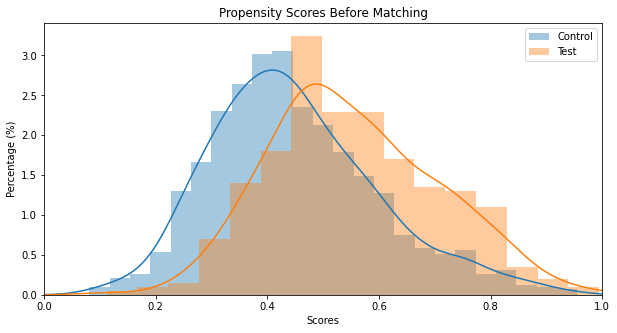

In [240]:
m.plot_scores()

In [247]:
matched_data = m.match(method="min", nmatches=1, threshold=0.0001)

In [248]:
matched_pairs_df = m.matched_data.sort_values("match_id")

In [249]:
matched_pairs_df

,population,income,house_value,rent,unemployment,poverty,dispensary_status,scores,match_id,record_id
1079,6249,33160,303700,1332,0.04,0.09,1,0.358783,0,1079
316,3369,63966,717800,3501,0.04,0.01,0,0.358803,0,316
1080,5536,34940,345600,1815,0.02,0.05,1,0.325381,1,1080
564,6136,43192,365500,1486,0.07,0.06,0,0.325242,1,564
1081,8142,41688,366700,1836,0.04,0.05,1,0.221196,2,1081
...,...,...,...,...,...,...,...,...,...,...
225,3631,54338,385300,2243,0.04,0.04,0,0.397757,360,225
1445,11173,39632,343000,1381,0.04,0.02,1,0.111720,361,1445
524,8209,44550,593600,-666666666,0.02,0.02,0,0.110785,361,524
1446,5581,40310,371700,1252,0.02,0.08,1,0.363943,362,1446


In [252]:
matched_pairs_df.to_csv('matched_pairs_2021.csv')